In [22]:
library(dplyr)
library(ggplot2)

In [1]:
d52 = readRDS("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/sce_neurons_d52_none_subsample_10000cells.Rds")
rot = readRDS("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/sce_neurons_d52_rot_subsample_10000cells.Rds")

In [3]:
d52

class: SingleCellExperiment 
dim: 32738 10000 
metadata(0):
assays(1): counts
rownames(32738): ENSG00000243485 ENSG00000237613 ... ENSG00000215616
  ENSG00000215611
rowData names(0):
colnames(10000): CTTAACTAGACTAAGT-1-20 CCGTACTTCAGGCAAG-1-34 ...
  ACGGCCAAGAGACTTA-1-48 TAGTTGGTCAGCAACT-1-64
colData names(21): index batch ... n_counts_all celltype
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [4]:
rot

class: SingleCellExperiment 
dim: 32738 10000 
metadata(0):
assays(1): counts
rownames(32738): ENSG00000243485 ENSG00000237613 ... ENSG00000215616
  ENSG00000215611
rowData names(0):
colnames(10000): CCTACACAGTACGCCC-1-36 TAGAGCTCAAGCGAGT-1-58 ...
  ACACCGGCAACACGCC-1-55 GACGGCTAGGGAACGG-1-5
colData names(21): index batch ... n_counts_all celltype
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [9]:
donors1 = unique(d52$donor_id)
donors2 = unique(rot$donor_id)
length(donors1)
length(donors2)
common_donors = donors1[donors1 %in% donors2]
length(common_donors)

[1] 182

[1] 183

[1] 177

In [37]:
df1 = data.frame(cell = colnames(d52[,d52$donor_id %in% common_donors]),
                donor_id = d52[,d52$donor_id %in% common_donors]$donor_id,
                condition = "D52")
nrow(df1)
head(df1,2)

[1] 9991

cell,donor_id,condition
CTTAACTAGACTAAGT-1-20,HPSI0115i-paim_1,D52
CCGTACTTCAGGCAAG-1-34,HPSI0514i-rutc_2,D52


In [38]:
df2 = data.frame(cell = colnames(rot[,rot$donor_id %in% common_donors]),
                donor_id = rot[,rot$donor_id %in% common_donors]$donor_id,
                condition = "D52_ROT")
nrow(df2)
head(df2,2)

[1] 9989

cell,donor_id,condition
CCTACACAGTACGCCC-1-36,HPSI0614i-wihj_4,D52_ROT
TAGAGCTCAAGCGAGT-1-58,HPSI1113i-hayt_3,D52_ROT


In [39]:
df = rbind(df1,df2)

In [40]:
### day52 none
nmi_1 = readRDS("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/neuMat/nmi_neurons_day52_none.Rds")

In [41]:
df_nmi_1 = nmi_1$overallNMI
df_nmi_1$cell = rownames(df_nmi_1)
df_nmi_1$time_point = "D52"
df_nmi_1$condition = "D52"
head(df_nmi_1,2)

,overall,discriminable,activity,celltype,treatment,cell,time_point,condition
CTTAACTAGACTAAGT-1-20,0.5050777,0.5002210,0.3598966,Sert,NONE,CTTAACTAGACTAAGT-1-20,D52,D52
CCGTACTTCAGGCAAG-1-34,0.4982950,0.4793651,0.3773424,DA,NONE,CCGTACTTCAGGCAAG-1-34,D52,D52


In [42]:
### day52 rot
nmi_2 = readRDS("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/neuMat/nmi_neurons_day52_rot.Rds")

In [43]:
df_nmi_2 = nmi_2$overallNMI
df_nmi_2$cell = rownames(df_nmi_2)
df_nmi_2$condition = "D52_ROT"
head(df_nmi_2,2)

,overall,discriminable,activity,celltype,treatment,time_point,cell,condition
CCTACACAGTACGCCC-1-36,0.5001735,0.4829309,0.3858580,DA,ROT,D52,CCTACACAGTACGCCC-1-36,D52_ROT
TAGAGCTCAAGCGAGT-1-58,0.4979538,0.4954870,0.3900825,DA,ROT,D52,TAGAGCTCAAGCGAGT-1-58,D52_ROT


In [44]:
df_nmi = rbind(df_nmi_1, df_nmi_2)
nrow(df_nmi)
head(df_nmi,2)

[1] 20000

,overall,discriminable,activity,celltype,treatment,cell,time_point,condition
CTTAACTAGACTAAGT-1-20,0.5050777,0.5002210,0.3598966,Sert,NONE,CTTAACTAGACTAAGT-1-20,D52,D52
CCGTACTTCAGGCAAG-1-34,0.4982950,0.4793651,0.3773424,DA,NONE,CCGTACTTCAGGCAAG-1-34,D52,D52


In [45]:
df_to_plot = inner_join(df, df_nmi)
nrow(df_to_plot)
head(df_to_plot,2)

Joining, by = c("cell", "condition")
Warning message:
“Column `cell` joining factor and character vector, coercing into character vector”Warning message:
“Column `condition` joining factor and character vector, coercing into character vector”

[1] 19980

cell,donor_id,condition,overall,discriminable,activity,celltype,treatment,time_point
CTTAACTAGACTAAGT-1-20,HPSI0115i-paim_1,D52,0.5050777,0.5002210,0.3598966,Sert,NONE,D52
CCGTACTTCAGGCAAG-1-34,HPSI0514i-rutc_2,D52,0.4982950,0.4793651,0.3773424,DA,NONE,D52


In [46]:
file = '/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/diff_efficiency/diff_efficiency_by_cell_line.tsv'
diff_df = read.csv(file, sep='\t')
head(diff_df)

donor_id,diff_efficiency
HPSI0114i-bezi_3,0.58269720
HPSI0114i-eipl_1,0.01287835
HPSI0114i-fikt_3,0.40282686
HPSI0114i-kolf_2,0.47059133
HPSI0114i-lexy_2,0.72690535
HPSI0114i-posc_1,0.81349206


In [47]:
unique(df_to_plot$celltype)

[1] "Sert" "DA"

In [50]:
nmi_df_lines = df_to_plot %>% group_by(donor_id) %>% summarise(avg_NMI = mean(discriminable))
head(nmi_df_lines)

donor_id,avg_NMI
HPSI0114i-bezi_3,0.4866563
HPSI0114i-eipl_1,0.4664943
HPSI0114i-fikt_3,0.4893149
HPSI0114i-kolf_2,0.4900797
HPSI0114i-lexy_2,0.4941875
HPSI0114i-posc_1,0.4819822


In [52]:
df_scatterplot = inner_join(nmi_df_lines, diff_df)
head(df_scatterplot)

Joining, by = "donor_id"
Warning message:
“Column `donor_id` joining character vector and factor, coercing into character vector”

donor_id,avg_NMI,diff_efficiency
HPSI0114i-bezi_3,0.4866563,0.58269720
HPSI0114i-eipl_1,0.4664943,0.01287835
HPSI0114i-fikt_3,0.4893149,0.40282686
HPSI0114i-kolf_2,0.4900797,0.47059133
HPSI0114i-lexy_2,0.4941875,0.72690535
HPSI0114i-posc_1,0.4819822,0.81349206


In [54]:
cor.test(df_scatterplot$diff_efficiency, df_scatterplot$avg_NMI)


	Pearson's product-moment correlation

data:  df_scatterplot$diff_efficiency and df_scatterplot$avg_NMI
t = 8.3337, df = 175, p-value = 2.219e-14
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4184151 0.6309170
sample estimates:
      cor 
0.5330196 


[1] 0.5330196

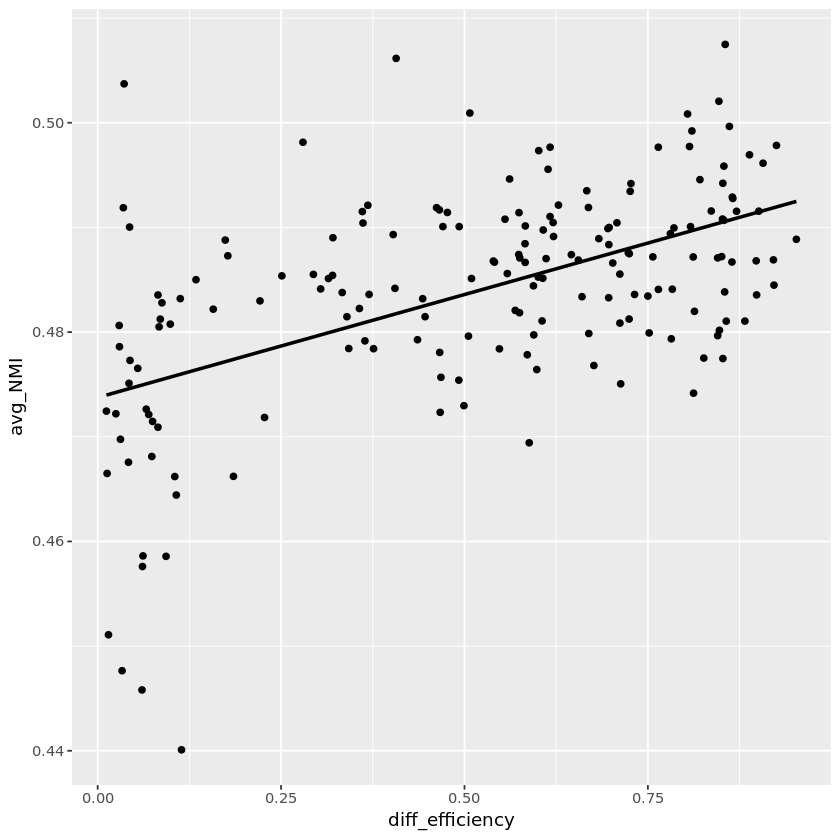

In [58]:
cor(df_scatterplot$diff_efficiency, df_scatterplot$avg_NMI)
ggplot(df_scatterplot, aes(x = diff_efficiency, y = avg_NMI)) + geom_point() + 
    stat_smooth(method = "lm", se = F,col = "black")